Susnata's Confidence Interval

🏎I have two years data that contains how many miles a specific car has driven on a daily basis. This is TRUE population. We will generate a random sample from this and try to predict population mean using a confidence interval with  95 percent confidence🏎

In [17]:
#Importing necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
    from google.colab import files
    uploaded = files.upload()

Saving miles.csv to miles.csv


In [3]:
df=pd.read_csv('miles.csv')

In [4]:
df.head()

,date,is_weekend,miles
0,2022-01-01,False,27
1,2022-01-02,True,5
2,2022-01-03,False,36
3,2022-01-04,False,32
4,2022-01-05,False,23


In [5]:
df.shape  #total population shape

(730, 3)

Plotting  a line graph to  how miles driven by a car that is varying  on a daily basis
Somedays driving miles has been more

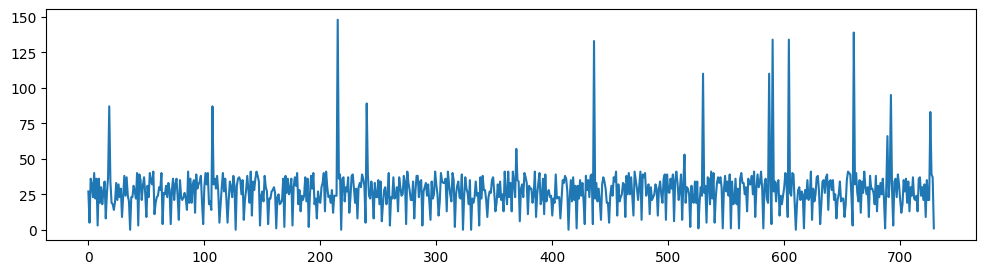

In [6]:
plt.figure(figsize=(12,3))
plt.plot(df.miles)

Now i am doing Population Distribution visualisation

<Axes: xlabel='miles', ylabel='Count'>

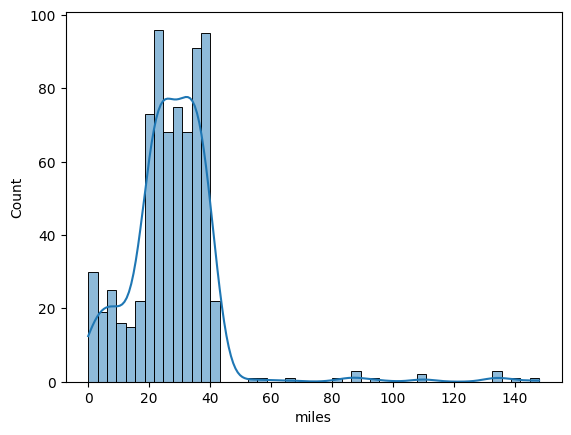

In [7]:
sns.histplot(df.miles, kde=True)

As I  can see it is a right skewed distribution with outliers. One option is to remove the outliers but I  will keep it  as it is . They represent the reality and   central limit theorem will take care of making the shape normal (for a sampling distribution)  

In [18]:
df.miles.describe()

,miles
count,730.000000
mean,27.627397
std,15.437588
min,0.000000
25%,21.000000
50%,28.000000
75%,35.000000
max,148.000000


In [19]:
mean_population = df.miles.mean()  #checkimng population mean that will not be given for predictimng confidence interval
std_dev_population = df.miles.std()  # standard deviation of population

mean_population, std_dev_population

(np.float64(27.627397260273973), 15.437588497596295)

In [20]:
SAMPLE_SIZE = 50   # taking a sample size more than 30 which is thumb rule FOR CLT

sample = df.sample(SAMPLE_SIZE, random_state=21) #21 for maintaining reproducibility
sample.head()

,date,is_weekend,miles
373,2023-01-09,False,29
462,2023-04-08,False,32
637,2023-09-30,False,39
22,2022-01-23,True,14
369,2023-01-05,False,57


In [21]:
mean_sample = sample.miles.mean()  # mean of sample
std_dev_sample = sample.miles.std() # standard deviation of sample

mean_sample, std_dev_sample

(np.float64(28.06), 10.264680875184958)

In [23]:
import scipy.stats as st  # importing scipy stats for CI

# If I consider middle 95% portion in the standard normal curve then that leaves 2.5% on left and 2.5% on the right. If I
# now count 95% plus 2.5% on left, it will give me  97.5% which means we need to locate 0.975 value in Z-table and find
# the corresponding Z score.For it covers cumulative probability of left hand side of the curve
z_score_95_confidence = st.norm.ppf(0.975) # 0.975 because 0.95 for the actual confidence level and on
z_score_95_confidence

np.float64(1.959963984540054)

In [24]:
# for 95% confidence interval, Z value will be 1.96

# now calculating margin of error( from image it is z* s/root of n)
margin_of_error = z_score_95_confidence*(std_dev_population/np.sqrt(SAMPLE_SIZE))
margin_of_error

np.float64(4.2790025875110596)

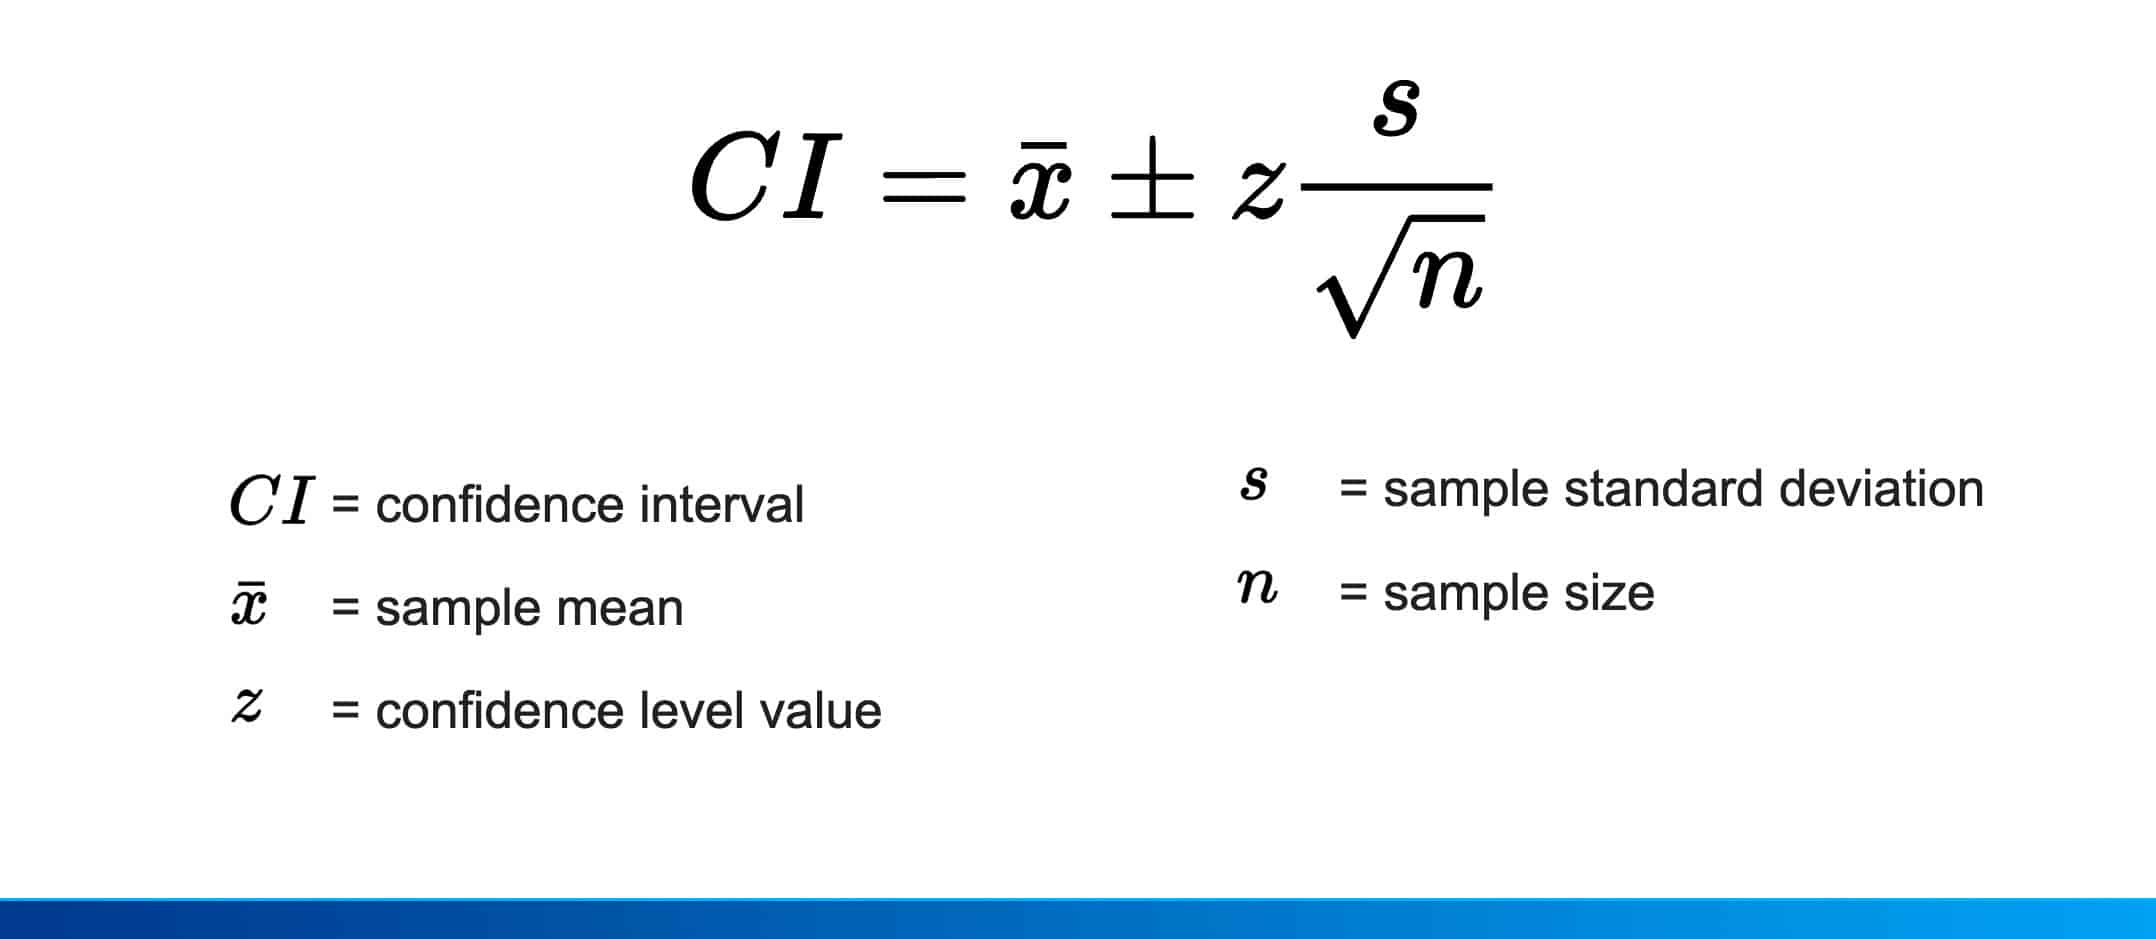

In [25]:
from IPython.display import Image, display
display(Image('https://www.questionpro.com/blog/wp-content/uploads/2022/08/confidence-interval-formula.jpg'))

In [26]:
lower = mean_sample - margin_of_error
upper = mean_sample + margin_of_error

lower, upper    # lower and upper bounds

(np.float64(23.78099741248894), np.float64(32.33900258751106))

In [27]:
mean_population

np.float64(27.627397260273973)

The true population mean is 27.6 which is lying in a predicted confidence interval of 23.78  - 32.33 which are my lower and upper bounds

I may hence say with 95 percent confidence that the true population mean lies in betweern 23.78 and 32.3 with is interval estimate .

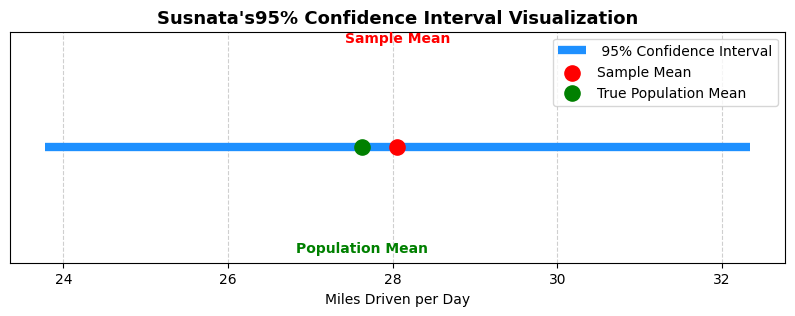

In [32]:
# creating a visualisation of 95 percent CI

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.hlines(y=1, xmin=lower, xmax=upper, color='dodgerblue', linewidth=6, label=" 95% Confidence Interval")
plt.scatter(mean_sample, 1, color='red', s=120, zorder=3, label='Sample Mean')
plt.scatter(mean_population, 1, color='green', s=120, zorder=3, label='True Population Mean')

# Adding text annotations
plt.text(mean_sample, 1.05, 'Sample Mean', color='red', ha='center', fontsize=10, fontweight='bold')
plt.text(mean_population, 0.95, 'Population Mean', color='green', ha='center', fontsize=10, fontweight='bold')

# Labels and title
plt.title("Susnata's95% Confidence Interval Visualization", fontsize=13, fontweight='bold')
plt.xlabel('Miles Driven per Day')
plt.yticks([])  # Hide y-axis since it’s a single line
plt.legend(loc='upper right')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()